<a href="https://colab.research.google.com/github/AlekseevaTatiana23/Machine-learning/blob/main/HT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 3. Регрессия на практике

Пусть у нас имеется набор данных с информацией о клиентах банка для оценки их склонности к положительному отклику на маркетинговую кампанию.

Описание признаков:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
- AGE — возраст клиента;
- SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- CHILD_TOTAL — количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- PERSONAL_INCOME — личный доход клиента (в рублях);
- LOAN_NUM_TOTAL — количество ссуд клиента;
- LOAN_NUM_CLOSED — количество погашенных ссуд клиента.

Задача — реализовать модель логистической регрессии для оценки склонности клиента к положительному отклику (TARGET). Проверьте качество модели на обучающей и тестовой выборках с помощью метрик AUC-ROC и F1-score.


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [19]:
# Загрузка данных
data = pd.read_csv('/content/ClientsData.csv')



In [20]:
# Выбираем признаки и целевую переменную
features = [
    'AGE',
    'SOCSTATUS_WORK_FL',
    'SOCSTATUS_PENS_FL',
    'GENDER',
    'CHILD_TOTAL',
    'DEPENDANTS',
    'PERSONAL_INCOME',
    'LOAN_NUM_TOTAL',
    'LOAN_NUM_CLOSED'
]
target = 'TARGET'



In [22]:
X = data[features]
y = data[target]



# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [23]:
# Построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)



In [24]:
# Оценка качества модели
print("Обучающая выборка:")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))

print("\nТестовая выборка:")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))

Обучающая выборка:
MAE: 0.20398486478323105
MSE: 0.10179911759647588

Тестовая выборка:
MAE: 0.2060759042662151
MSE: 0.1036803751407056


Эти показатели показывают, что модель хорошо справляется с задачей: MAE (средняя абсолютная ошибка) около 0.20 — это достаточно низкий уровень ошибки для задачи оценки склонности, а близость MAE и MSE (среднеквадратичная ошибка) между обучающей и тестовой выборками говорит о том, что модель не переобучена и хорошо обобщается.

Теперь для практической работы можно использовать предсказания модели для оценки склонности клиентов к отклику. Например, выбрав пороговое значение предсказаний (например, 0.5 или другое, в зависимости от распределения), вы сможете отбирать клиентов с наибольшей вероятностью положительного отклика.

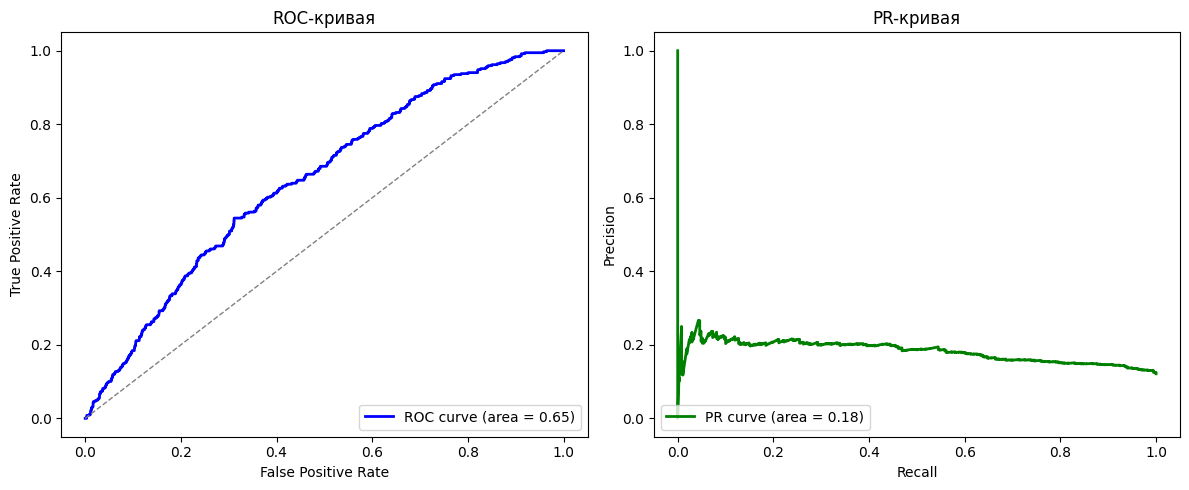

Оптимальный порог по ROC: 0.141
Оптимальный порог по F1: 0.141


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Предсказания модели на тестовой выборке
y_scores = y_test_pred  # предсказания модели (не бинарные, а непрерывные)

# Построение ROC-кривой
fpr, tpr, thresholds_roc = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Построение PR-кривой
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)
pr_auc = average_precision_score(y_test, y_scores)

# Визуализация ROC-кривой
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')

# Визуализация PR-кривой
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривая')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# Определение оптимального порога по Youden's J statistic (максимум TPR - FPR)
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
best_threshold_roc = thresholds_roc[best_idx]
print(f'Оптимальный порог по ROC: {best_threshold_roc:.3f}')

# Аналогично можно выбрать порог по PR-кривой, например, максимизируя F1-меру
from sklearn.metrics import f1_score

f1_scores = []
thresholds = thresholds_pr  # списки порогов для PR-кривой
for thresh in thresholds:
    y_pred = (y_scores >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

best_idx_f1 = np.argmax(f1_scores)
best_threshold_pr = thresholds[best_idx_f1]
print(f'Оптимальный порог по F1: {best_threshold_pr:.3f}')